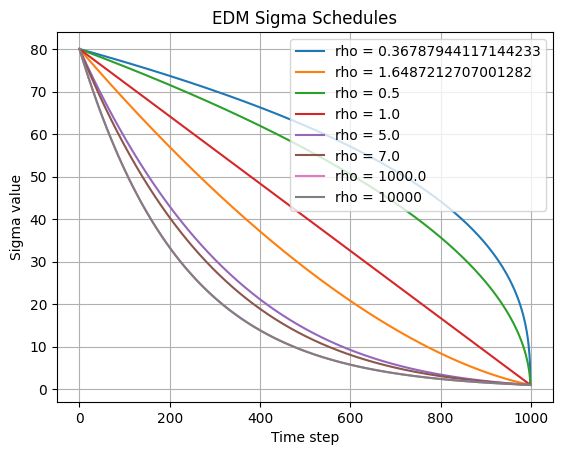

In [11]:
import torch
import matplotlib.pyplot as plt
from math import exp

def edm_sigma_schedule(Tmax, sigma_min=3.0, sigma_max=5.0, rho=7.0):
    """
    Construct a list of `sigma` values (noise levels) using EDM's noise schedule.

    Args:
        Tmax (int): Number of discrete time steps.
        sigma_min (float): Minimum noise level.
        sigma_max (float): Maximum noise level.
        rho (float): Controls nonlinearity of the schedule.

    Returns:
        torch.Tensor: Shape [Tmax], monotonically decreasing sigmas.
    """
    device = 'cpu'
    step_indices = torch.arange(Tmax, device=device).float()
    t_steps = (
        sigma_max ** (1 / rho)
        + (sigma_min ** (1 / rho) - sigma_max ** (1 / rho)) 
          * step_indices / (Tmax - 1)
    ) ** rho
    return t_steps

# Parameters
Tmax = 1000
sigma_min = 1.0
sigma_max = 80.0
rho_values = [exp(-1),exp(0.5),0.5,1.0, 5.0, 7.0, 1000.0, 10000]

# Generate and plot the schedules in one figure
plt.figure()  # Single figure for all plots
for rho in rho_values:
    sigmas = edm_sigma_schedule(Tmax, sigma_min, sigma_max, rho)
    plt.plot(sigmas, label=f"rho = {rho}")

plt.title("EDM Sigma Schedules")
plt.xlabel("Time step")
plt.ylabel("Sigma value")
plt.legend()
plt.grid(True)
plt.show()

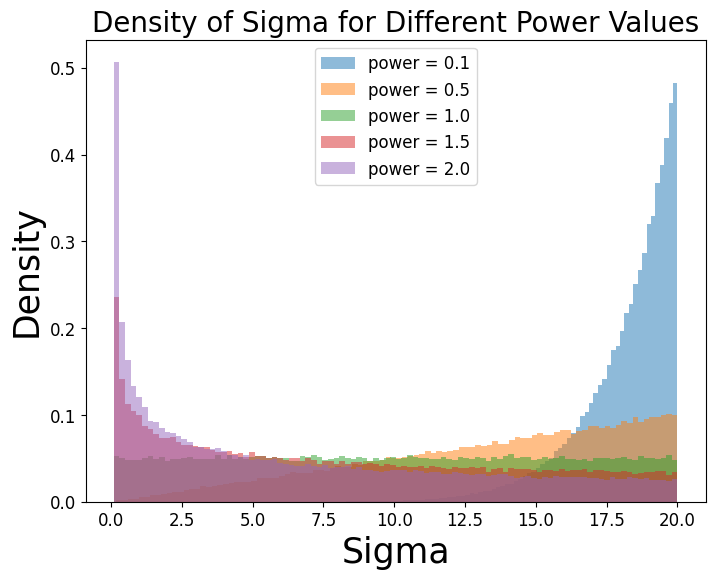

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sample_power_sigma_numpy(batch_size, power=1/3, min_val=2, max_val=20):
    # Sample t uniformly from [0, 1]
    t = np.random.rand(batch_size, 1)
    sigma = min_val + np.power(t, power) * (max_val - min_val)
    return sigma.flatten()

# Parameters
batch_size = 100000
min_val = 0.1
max_val = 20

# Define different power values to compare.
powers = [0.1, 0.5, 1.0, 1.5, 2.0]

plt.figure(figsize=(8, 6))
for p in powers:
    sigma = sample_power_sigma_numpy(batch_size, power=p, min_val=min_val, max_val=max_val)
    plt.hist(sigma, bins=100, density=True, alpha=0.5, label=f'power = {p}')

plt.xlabel('Sigma', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Density of Sigma for Different Power Values', fontsize=20)
plt.legend(fontsize=12)
plt.show()



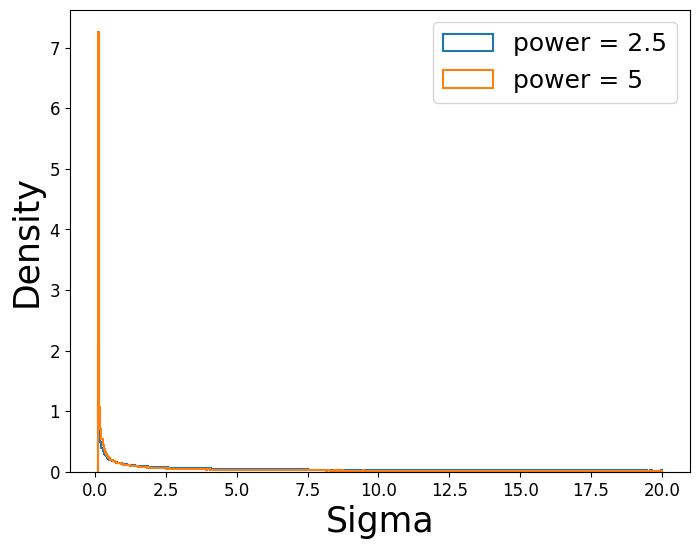

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sample_power_sigma_numpy(batch_size, power=1/3, min_val=2, max_val=20):
    # Sample t uniformly from [0, 1]
    t = np.random.rand(batch_size, 1)
    sigma = min_val + np.power(t, power) * (max_val - min_val)
    return sigma.flatten()

# Parameters
batch_size = 1000000
min_val = 0.1
max_val = 20

# Define different power values to compare.
#powers = [0.1, 0.5, 1.0, 1.5, 5]
powers = [5]
plt.figure(figsize=(8, 6))
for p in powers:
    sigma = sample_power_sigma_numpy(batch_size, power=p, min_val=min_val, max_val=max_val)
    # Use histtype='step' to avoid filling the space with color
    plt.hist(sigma, bins=500, density=True, histtype='step', linewidth=1.5, label=f'power = {p}')

plt.xlabel('Sigma', fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#plt.title('Density of Sigma for Different Power Values', fontsize=20)
plt.legend(fontsize=18)
plt.show()
